# Introduction
This project focuses on the analysis of two sets of data related to the taxi industry in Chicago. The main objective is to understand travel patterns in the city and evaluate the influence of various factors on travel duration.

#Data upload

In [80]:
#Load all libraries
import pandas as pd
from scipy import stats as st
import math as mt
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from datetime import datetime
from scipy.stats import levene, ttest_ind

In [81]:
#Load the data files
df1 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv')
df2 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv')
df3 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv')

# Exploratory data analysis (Python)

In [82]:
#Print the general/summarized information about the DataFrame number 1
df1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [83]:
#Analyze general information
df1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [84]:
#Analyze general information
df2.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [85]:
#Analyze general information
df3.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [86]:
#show average_trips column
df2['average_trips']

0     10727.466667
1      9523.666667
2      6664.666667
3      5163.666667
4      2546.900000
          ...     
89        3.137931
90        3.117647
91        2.333333
92        1.961538
93        1.800000
Name: average_trips, Length: 94, dtype: float64

In [87]:
#Analyze general information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [88]:
#Analyze general information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [89]:
#Analyze general information
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [90]:
#DF1 duplicate check
df1.duplicated().sum()

0

In [91]:
#DF2 duplicate check
df2.duplicated().sum()

0

In [92]:
#DF3 duplicate check
df3.duplicated().sum()

197

In [93]:
#Show duplicates for the dataframe
duplicated = df3[df3.duplicated()]
duplicated

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [94]:
df2['average_trips'] = df2['average_trips'].round(2)

3 data frames were analyzed:

df1 contains the name of the taxi company and the number of trips for each taxi company on November 15 and 16, 2017. With 64 entries, no duplicates and no missing values.

df2 contains the Chicago neighborhoods where trips ended and the average number of trips that ended in each neighborhood in November 2017. No duplicates and no missing values.
df3 contains the date and time of the pickup, the weather conditions at the time the trip began, and the duration of the trip in seconds. No missing values ​​were found, but duplicate values ​​were found, which will not be eliminated because they correspond to different trips; the same schedule can have several trips with the same weather conditions and even the same duration.

# Identify the top 10 neighborhoods in terms of tour completion

In [95]:
#identify the top 10 neighborhoods in terms of tour completion
df2.sort_values('average_trips', ascending = False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


In [96]:
df1_top10 = df1.sort_values('trips_amount',ascending = False).head(10)

# Charts for taxi companies and number of trips

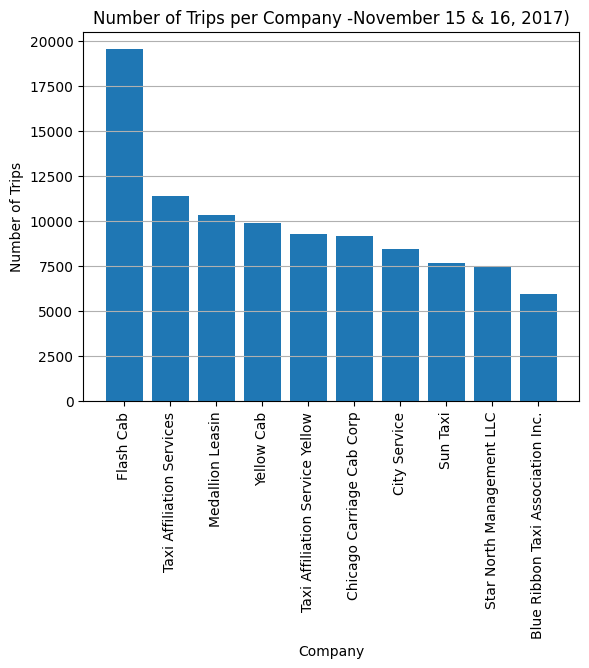

In [105]:
# Create a bar chart to visualize the data
plt.bar(df1_top10['company_name'], df1_top10['trips_amount'])

# Label the chart axes
plt.xlabel('Company') # Clarify label translation
plt.ylabel('Number of Trips') # Clarify label translation

# Add a title to the chart
plt.title('Number of Trips per Company -November 15 & 16, 2017)') 

# Rotate x-axis labels for better readability with long company names
plt.xticks(rotation=90)

# Add gridlines to the chart for better visualization
plt.grid(axis='y')

In [98]:
df2_top10 = df2.sort_values('average_trips',ascending = False).head(10)

# Top 10 neighborhoods by number of completions

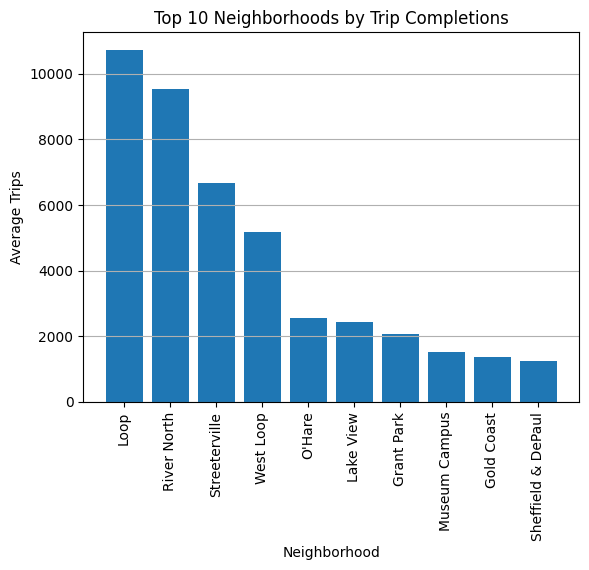

In [106]:
# Plot a bar graph to visualize the data
plt.bar(df2_top10['dropoff_location_name'], df2_top10['average_trips'])

# Label the axes for clarity
plt.xlabel('Neighborhood')  # X-axis label: Neighborhood
plt.ylabel('Average Trips')  # Y-axis label: Average Trips

# Set the title for the plot
plt.title('Top 10 Neighborhoods by Trip Completions')

# Rotate x-axis labels for better readability if many neighborhoods
plt.xticks(rotation=90)

# Add gridlines to the y-axis for better visualization
plt.grid(axis='y')

We can conclude that Flash Cab has led the number of trips for November 15 and 16, with almost 20,000 trips, while the other companies remained below 12,500 trips. We can also conclude about the top 10 neighborhoods by number of completions that Loop is the neighborhood in which the most trips end, which tells us that it is a very popular neighborhood.

# Hypothesis testing (Python)

In [100]:
df3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [101]:
df3['start_ts'] = pd.to_datetime(df3['start_ts'], format='%Y-%m-%d %H:%M:%S')


In [102]:
# Filter the DataFrame for rides with 'Good' weather conditions
good_w = df3[df3['weather_conditions'] == 'Good']['duration_seconds'] 

# Filter the DataFrame for rides with 'Bad' weather conditions
bad_w = df3[df3['weather_conditions'] == 'Bad']['duration_seconds']

H0: the variance of the data for weather conditions = Good == the variance of the data for weather conditions = Bad

H1: the variance of the data for weather conditions = Good == the variance of the data for weather conditions = Bad

In [103]:
# Set the significance level (alpha)
alpha = 0.05 

# Perform Levene's test for equality of variances
result = levene(good_w, bad_w) 

# Print the p-value of the Levene's test
print('valor p:', result.pvalue)

# Compare the p-value to the significance level
if result.pvalue < alpha:
    print('We reject the null hypothesis (the variances are significantly different)') 
else:
    print('We cannot reject the null hypothesis (the variances are approximately equal)')

valor p: 0.5332038671974493
We cannot reject the null hypothesis (the variances are approximately equal)


H0: "The average trip length from the Loop to O'Hare International Airport is the same on rainy Saturdays."

H1: "The average trip length from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [104]:
# Set the significance level (alpha)
alpha = 0.05 

# Perform an independent two-sample t-test, assuming equal variances
results = st.ttest_ind(good_w, bad_w, equal_var=True)

# Print the p-value
print('p-value:', results.pvalue)

# Compare the p-value to the significance level
if results.pvalue < alpha:
    print('Reject the null hypothesis.') 
else:
    print('Fail to reject the null hypothesis.')

p-value: 6.517970327099473e-12
Reject the null hypothesis.


The p value obtained (6.517970327099473e-12) is lower than the significance level (α) of 0.05. This means that there is statistically significant evidence to reject the null hypothesis.

In other words, we can conclude that the average trip length from the Loop to O'Hare International Airport does change on rainy Saturdays.
Trips from the Loop to O'Hare International Airport are likely to be longer on rainy Saturdays compared to other days or weather conditions. This could be due to factors such as:

Increased traffic congestion: Rain could cause more traffic on the streets, which slows down travel.
Reduced taxi availability: Fewer taxis may be available on rainy days, increasing wait times and trip lengths.
More cautious driving: Drivers may be more cautious in rainy conditions, reducing speeds and extending travel time.

## Conclusion 
 In this project, a comprehensive analysis of three data sets related to the taxi industry in the city of Chicago has been carried out, and a hypothesis test has been carried out to evaluate the influence of weather conditions on the duration of trips. . Below is a detailed summary of the activities carried out and the conclusions obtained:

### Loading and Importing Data:
Two CSV data sets were imported: /datasets/project_sql_result_01.csv, /datasets/project_sql_result_04.csv and /datasets/project_sql_result_07.csv.
The structure and content of the data was verified to ensure its integrity and consistency.

### Exploratory Data Analysis:

The data were explored descriptively to understand the distribution of variables, identify patterns, and detect potential anomalies.
The 10 taxi companies with the highest number of trips and the 10 neighborhoods with the highest concentration of trip completions were identified.

### Views:

Bar graphs were created to represent the number of trips per taxi company and the number of trip completions per neighborhood.
The graphs provided a clear visual representation of the trends and patterns identified in the data.

### Hypothesis Testing:
It was hypothesized that the average trip length from the Loop to O'Hare International Airport changes on rainy Saturdays.
Student's t test was used to compare trip duration on rainy Saturdays with that on other days or weather conditions.
A p value of 6.517970327099473e-12 was obtained, indicating that there is statistically significant evidence to reject the null hypothesis.

### Conclusions:
The taxi company with the highest number of trips during the period analyzed was Flash Cab.
The neighborhoods with the highest concentration of trip completions were The Loop, River North and Streeterville.
The average trip length from the Loop to O'Hare International Airport does change on rainy Saturdays, with these trips being longer compared to other days or weather conditions.